In [7]:
!pip install collatex
!pip install graphviz
!pip install levenshtein
!pip install xmltodict
!pip install beautifulsoup4
!pip install lxml

You should consider upgrading via the '/Users/surajkhan/Documents/scribes_internship/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/surajkhan/Documents/scribes_internship/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/surajkhan/Documents/scribes_internship/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/surajkhan/Documents/scribes_internship/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/surajkhan/Documents/scribes_internship/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/surajkhan/Documents/scribes_internship/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
from collatex import *
collation = Collation()
collation.add_plain_witness("A", "The quick brown fox jumps over the dog.")
collation.add_plain_witness("B", "The brown fox jumps over the lazy dog.")
alignment_table = collate(collation, segmentation= False)
print(alignment_table)

+---+-----+-------+-------+-----+-------+------+-----+------+-----+---+
| A | The | quick | brown | fox | jumps | over | the | -    | dog | . |
| B | The | -     | brown | fox | jumps | over | the | lazy | dog | . |
+---+-----+-------+-------+-----+-------+------+-----+------+-----+---+


In [5]:
from collatex import *
collation = Collation()
collation.add_plain_witness("A", "The gray koala")
collation.add_plain_witness("B", "The brown koala")
alignment_table = collate(collation , segmentation = False)
print(alignment_table)

+---+-----+-------+-------+
| A | The | gray  | koala |
| B | The | brown | koala |
+---+-----+-------+-------+


In [6]:
from collatex import *
collation = Collation()
collation.add_plain_witness("A", "The big gray koala")
collation.add_plain_witness("B", "The brown koala")
alignment_table = collate(collation, segmentation=False)
print(alignment_table)

+---+-----+-------+------+-------+
| A | The | big   | gray | koala |
| B | The | brown | -    | koala |
+---+-----+-------+------+-------+


In [7]:
import json
from collatex import *
collation = Collation()
json_input = """{
    "witnesses": [
        {
            "id": "A",
            "tokens": [
                {
                    "t": "The ",
                    "n": "The"
                },
                {
                    "t": "quick ",
                    "n": "quick"
                },
                {
                    "t": "brown ",
                    "n": "brown"
                },
                {
                    "t": "fox ",
                    "n": "fox"
                },
                {
                    "t": "jumps ",
                    "n": "jumps"
                },
                {
                    "t": "over ",
                    "n": "over"
                },
                {
                    "t": "the ",
                    "n": "the"
                },
                {
                    "t": "dog",
                    "n": "dog"
                },
                {
                    "t": ".",
                    "n": "."
                }
            ]
        },
        {
            "id": "B",
            "tokens": [
                {
                    "t": "The ",
                    "n": "The"
                },
                {
                    "t": "brown ",
                    "n": "brown"
                },
                {
                    "t": "fox ",
                    "n": "fox"
                },
                {
                    "t": "jumps ",
                    "n": "jumps"
                },
                {
                    "t": "over ",
                    "n": "over"
                },
                {
                    "t": "the ",
                    "n": "the"
                },
                {
                    "t": "lazy ",
                    "n": "lazy"
                },
                {
                    "t": "dog",
                    "n": "dog"
                },
                {
                    "t": ".",
                    "n": "."
                }
            ]
        }
    ]
}"""
print(collate(json.loads(json_input)))

+---+-----+-------+--------------------------+------+------+
| A | The | quick | brown fox jumps over the | -    | dog. |
| B | The | -     | brown fox jumps over the | lazy | dog. |
+---+-----+-------+--------------------------+------+------+


In [2]:
# This is building an alternate parser for the XML
# This block is meant for fixing the tags of the <chap>
# This block is for fixing the incorrect tag closing of <chap>
from lxml import etree
import json,re,xmltodict


# First load a document and find the number of chapters the file contains
with open("../data/ms_f.xml",encoding="utf8") as xml_file:

    #read content of file to string
    data = xml_file.read()
    #first replace </chap> with empty
    new_data=data.replace("</chap>","")
    #Then replace <chap> with </chap><chap>
    #Replace first occurrence to restore <chap>
    new_data1=new_data.replace("<chap>","</chap><chap>").replace("</chap><chap>","<chap>",1)
    # To compensate chapter closing replace </Article> with </chap></Article>
    # But this has to be the last occurence so we use rfind
    replacementStr="</chap></Article>"
    new_data1=replacementStr.join(new_data1.rsplit("</Article>", 1))

    #json_data = json.dumps(final_data,ensure_ascii=False,indent=1)
     
    # Write the json data to output
    # json file
    with open("ms_f_new.xml", "w", encoding="utf8") as json_file:
        json_file.write(new_data1)
        json_file.close()




Manuscript A:  ונשען עליה ולא ימוט	ובה יבטח ולא יבוש׃ 
Manuscript B:  ונשען עליה ולא ימוט	ובה יב̇ט̊̊ח̊̊ ו̊̊לא̇ ב̊̊ו̊̊ש̊̊

('ms_a_new.xml', 'Chapter 15', 'ms_b_new.xml', 'Siracide 15', '4')


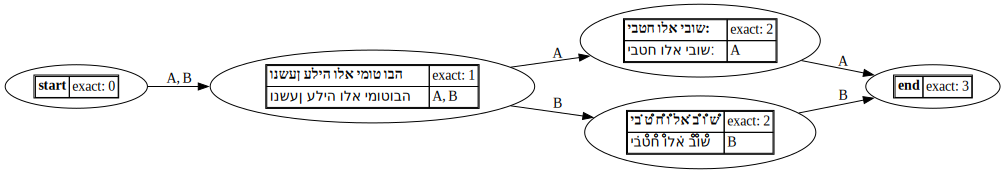

In [43]:
# See if beautiful soup can be of any use
# This part of the code is clunky but it is what it is

# Implementation
from itertools import combinations
from bs4 import BeautifulSoup
import re

fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
soup = dict()
chapter = dict()
verse_list = dict()
verses = dict()

for currFile in fileNames:
    with open(currFile,encoding="utf8") as fp:
        soup[currFile] = BeautifulSoup(fp,features='xml')
        chs = list()
        verse_list[currFile] = dict()
        verses[currFile] =dict()
        for i in soup[currFile].findAll("chap"):
            ch_string=i.contents[0].strip()
            chs.append(ch_string) # strip to remove trailing spaces or new line characters
            verses_list = list()
            verse = i.findAll("text")
            verses[currFile][ch_string] = dict()
            for verse_iter in verse:
                if verse_iter.verse_nb:
                    verse_num=verse_iter.verse_nb.text.strip()
                verses_list.append(verse_num)
                """
                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->
                """
                # For now clean the text which might be enclosed in the tags
                unwanted_tags= ["folio","verse_nb","line","vacat_car","greek","reconstructed","superscript",\
                "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                "margin_supralinear","Article"]
                
                # Clean tags
                [s.extract() for s in verse_iter(unwanted_tags)]
                
                # FileName will never be empty
                if (ch_string and verse_num):
                    verses[currFile][ch_string][verse_num] = verse_iter.text.replace("[","").replace("]","")
            verse_list[currFile][ch_string]=verses_list
        
        chapter[currFile] = chs
        #verse = chapter[currFile].findAll("text")
        #for i in verse:
            #print(i.verse_nb.text)
            #print(i.contents)
            #ls = [type(item) for item in i.contents]
            #print(ls)
            #print("\n")


#print(soup['ms_d_new.xml'].findAll("chap")[0].contents[0])




# Building the combinations
chap_matching = dict()
witnesses = dict()
chap_info = dict()
count = 0
for combo in combinations(fileNames, 2):  # 2 for pairs, 3 for triplets, etc
    matching_chs_list = []
    if combo[0] in chap_matching.keys():
        pass
    else:
        chap_matching[combo[0]] = dict()
    for chap_in_file1 in chapter[combo[0]]:
        for chap_in_file2 in chapter[combo[1]]:
            ch1_num=re.findall(r'\b\d+\b', chap_in_file1)
            ch2_num=re.findall(r'\b\d+\b', chap_in_file2)
            if ch1_num == ch2_num:
                matching_chs_list.append([chap_in_file1,chap_in_file2]) 
                # Lets see if we can find common verses
                common_verses= set(verse_list[combo[0]][chap_in_file1]).intersection(verse_list[combo[1]][chap_in_file2])
                for com_verse in common_verses:
                    if com_verse:
                        witnesses[count] = dict()
                        witnesses[count]['A'] = verses[combo[0]][chap_in_file1][com_verse]
                        witnesses[count]['B'] = verses[combo[1]][chap_in_file2][com_verse]
                        chap_info[count] = (combo[0],chap_in_file1,combo[1],chap_in_file2,com_verse)
                        count = count+1;
    chap_matching[combo[0]][combo[1]]=matching_chs_list
    

witness_index=22
from collatex import *
collation = Collation()
collation.add_plain_witness("A", witnesses[witness_index]['A'])
collation.add_plain_witness("B", witnesses[witness_index]['B'])
print("\nManuscript A: "+witnesses[witness_index]['A'])
print("Manuscript B: "+witnesses[witness_index]['B']+"\n")
#alignment_table = collate(collation, segmentation=False)
#print(chap_matching)
#print(verses)
print(chap_info[witness_index])
alignment_table = collate(collation,output="svg")


            


In [10]:
from collatex import *
from lxml import etree
import json,re,xmltodict

# Prepare data for parsing into tokens
# open the input xml file and read
# data in form of python dictionary
# using xmltodict module
with open("ms_a_new.xml",encoding="utf8") as xml_file1:
    data_dict = xmltodict.parse(xml_file1.read())
    # xml_file.close()
     
    # generate the object using json.dumps()
    # corresponding to json data
     
    json_data = json.dumps(data_dict,ensure_ascii=False,indent=1)
     
    # Write the json data to output
    # json file
    with open("ms_a_new.json", "w", encoding="utf8") as json_file:
        json_file.write(json_data)
        json_file.close()




In [14]:
import json,re,xmltodict
from collatex import *

f = open('ms_a_new.json',encoding="utf8")
  
# returns JSON object as 
# a dictionary
data = json.load(f)

print(data['Root']['Article']['chap'])
# Iterating through the json
# list
count=0;
for i in data['Root']['Article']['chap']:
    if '#text' in i:
        print(i['verse_nb'])
        print(i['#text'])
        count=count+1
  
# Closing file
f.close()

[{'text': [{'verse_nb': '20i', 'line': '1', 'reconstructed': 'ועשו ותכתבו בספרי', 'folio': 'T.S. 12.863 recto (offset letters)', '#text': '[                                   ]דבר̇י̊ ש̇מעו []'}, {'verse_nb': '20j', 'line': '2', 'reconstructed': ['חיים׃', 'הבו יראת ייי ותנ'], '#text': '[     ]א[]ו̊ בה לבבכם̇ ו̊א̊ל̊ ת̊י̊ר̊א̊ו̊[׃         ]'}, {'verse_nb': '20kl', 'line': '3', 'reconstructed': ['קרבו אליה ואל תאחרו ו', 'לרוחכם׃ וכאשר קרבת'], '#text': '[]ת̇מ̇צאו̇ חיים̇ []'}, {'verse_nb': '20l–28', 'line': '4', 'reconstructed': ['כגבור וכאנש חיל׃ א\u200dל תכחש', 'ת ייי וא\u200dל תג', 'א\u200dליה בלב ולב'], '#text': '[]ביר̇א̊[]ֹע̊[]'}], '#text': 'Chapter 1'}, {'text': [{'verse_nb': '6', 'line': '1', 'folio': 'T.S. 12.863 recto', '#text': '[             ] מכבד אמו׃'}, {'verse_nb': '8', 'line': '2', '#text': 'בני במאמר ובמעשה כבד אביך\tעבור ישיגוך כל ברכות׃'}, {'verse_nb': '9', '#text': 'ברכת אב תיסד שרש\tוקללת אם תנתש נטע׃'}, {'verse_nb': '10', 'line': '3', '#text': 'אל תתכבד בקלון אביך\tכי לא

KeyError: 'verse_nb'

In [16]:
import json,re,xmltodict
from collatex import *

f = open('./ms_a.json',encoding="utf8")
  
# returns JSON object as 
# a dictionary
data = json.load(f)

collation = Collation()
# Iterating through the json
# list
count=0;
for i in data['Root']['Article']['text']:
        if '#text' in i:
            #print(i['verse_nb'])
            #print(i['#text'])
            if count == 12:
                print(i['#text'])
                collation.add_plain_witness("A", i['#text'])
            elif count == 14:
                print(i['#text'])
                collation.add_plain_witness("B", i['#text'])
            count=count+1

f.close()       
alignment_table = collate(collation, output = 'svg')
print(alignment_table)
# Closing file


ביום צרה תזכר לך	כחם על כפור להשבית עוניך׃
בני בעשרך התהלך בענוה	ותאהב מנותן מתנות•


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH